# PyTorch

PyTorch is an open-source machine learning library primarily developed by Facebook's AI Research lab (FAIR) and will be used as our framework of choise. It provides a flexible framework for building and training deep neural networks and supports GPU acceleration, making it suitable for training large-scale models efficiently. It's widely used in both research and industry for various tasks related to the field of machine learning such as image classification, natural language processing, reinforcement learning, and more.

## Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. PyTorch uses tensors to encode the inputs and outputs of a model, as well as the model's weights.

Tensors are similar to NumPy arrays, except that tensors can run on GPUs or other hardware accelerators and are optimized for automatic differentiation.

In [1]:
import torch
import numpy as np

Tensors can be created directly from data, automatically inferring its data type.

In [2]:
data = [[1, 2],[3, 4]]
tensor = torch.tensor(data)

print(tensor)
print(tensor.dtype)

tensor([[1, 2],
        [3, 4]])
torch.int64


Tensors can also be created from NumPy arrays.

In [3]:
np_array = np.array(data)
tensor = torch.from_numpy(np_array)

print(tensor)

tensor([[1, 2],
        [3, 4]])


Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [4]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


By default, tensors are created on the CPU. We need to explicitly move tensors to the GPU using the `.to` method. You can check for GPU availability in case of faulty configuarations by using a cuda function.

In [5]:
if torch.cuda.is_available():
    tensor = tensor.to("cuda")
    print(tensor)
else:
    print("No GPU available.")

tensor([[0.8873, 0.2871, 0.9321, 0.2441],
        [0.4977, 0.1971, 0.4240, 0.1973],
        [0.9986, 0.8785, 0.1058, 0.6843]], device='cuda:0')


Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing, indexing, slicing), sampling and more are possible.

In [6]:
data = [[1, 2, 3],[4, 5, 6]]
tensor = torch.tensor(data)

# Computes the matrix multiplication between two tensors.
# '.T' returns the transpose of a tensor.
y = tensor @ tensor.T
print(y)

# Computes the element-wise product.
z = tensor * tensor
print(z)

tensor([[14, 32],
        [32, 77]])
tensor([[ 1,  4,  9],
        [16, 25, 36]])


## Datasets & DataLoaders

PyTorch provides two data primitives: **DataLoader** and **Dataset** that allows using pre-loaded datasets as well as your own data.

* A Dataset in PyTorch represents a collection of data samples. It provides a consistent interface to access the samples, typically by index, and possibly perform transformations on them. PyTorch provides a `torch.utils.data.Dataset` class that you can inherit from to create custom data sets.

* DataLoaders wrap a Dataset and provides functionality for efficient batch loading of data. It takes a Dataset instance and allows iterating over batches of data samples. DataLoaders handle shuffling, batching, and loading the data in parallel. PyTorch offers the `torch.utils.data.DataLoader` class for creating Dataloaders.

We will use the MNIST data set from TorchVision as an example of how to load a  pre-loaded dataset.

> The MNIST dataset is a collection of handwritten digits commonly used for training various image processing systems. It stands for *Modified National Institute of Standards and Technology* database. MNIST consists of a training set of 60,000 examples and a test set of 10,000 examples, each representing a 28x28 pixel grayscale image of a handwritten digit from 0 to 9. MNIST is often used as a benchmark dataset for testing machine learning algorithms, particularly in the field of deep learning and image recognition.

In [7]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor


training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 108591330.72it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 58098654.11it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31301841.19it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 11921482.33it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Let's look at the used parameters while loading the data set:
* `root` is the path where the train/test data is stored,
* `train` specifies training or test dataset,
* `download=True` downloads the data from the internet if not available at root,
* `transform` and `target_transform` specify the feature and label transformations

We can also visualize some instances in our Dataset for data exploration using Matplotlib.

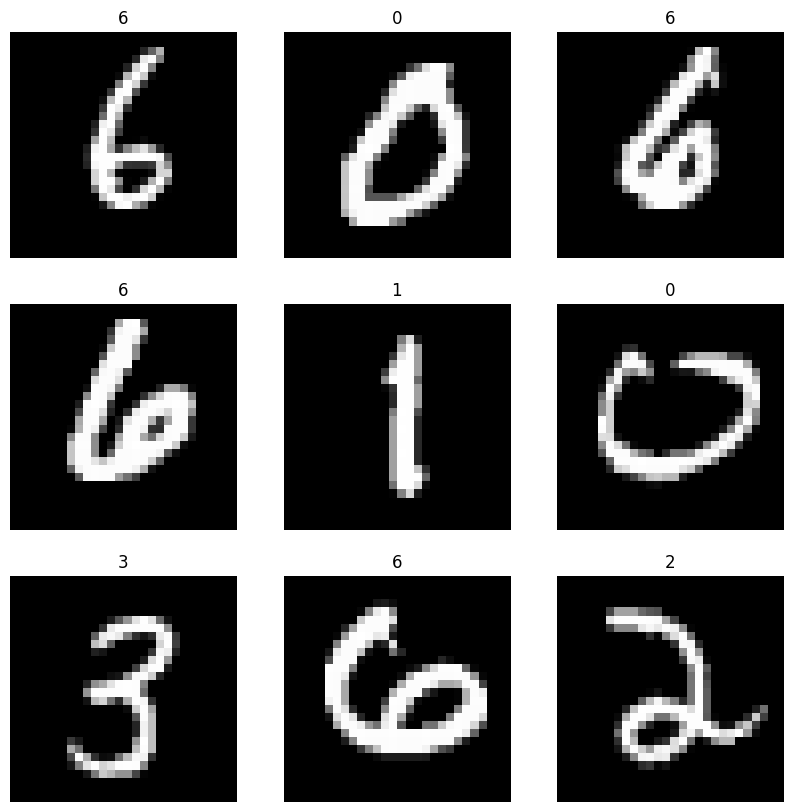

In [8]:
import matplotlib.pyplot as plt


figure = plt.figure(figsize=(10, 10))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

The `Dataset` retrieves our dataset's features and labels one sample at a time. While training a model, we typically want to pass samples in minibatches and eventually reshuffle the data at every epoch to reduce model overfitting.

We can use PyTorch's `DataLoader`, an iterable, that abstracts this complexity for us.

In [10]:
from torch.utils.data import DataLoader

batch_size = 32

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

During the model training we can just iterate trough our Dataloaders.

Feature batch shape: torch.Size([32, 1, 28, 28])
Labels batch shape: torch.Size([32])


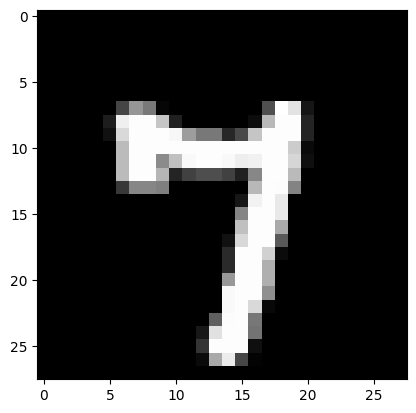

Label: 7


In [11]:
train_features, train_labels = next(iter(train_dataloader))

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [16]:
a = [[1, 2, 3]]
tensor = torch.tensor(a).squeeze()
print(tensor.shape)

torch.Size([3])


## Transforms

Data does not always come in its final processed form that is required for training machine learning algorithms. We use **transforms** to perform some manipulation of the data and make it suitable for training.

All TorchVision datasets have two parameters -`transform` to modify the features and `target_transform` to modify the labels - that accept callables containing the transformation logic.

The MNIST features are in PIL Image format, and the labels are integers. For training, we need the features as normalized tensors, and the labels as one-hot encoded tensors.

In one-hot encoding, each category is represented by a binary vector, where each dimension corresponds to a unique category, and only one dimension is "hot" (set to $1$) to indicate the presence of that category, while all other dimensions are "cold" (set to $0$).

For example, let's say you have a categorical variable "Color" with three categories: red, blue, and green. After one-hot encoding, the variable might look like this:

* Red: $[1, 0, 0]$
* Blue: $[0, 1, 0]$
* Green: $[0, 0, 1]$

In [18]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

`ToTensor` converts a PIL image or NumPy array into a `FloatTensor`. and scales the image's pixel intensity values in the range $[0., 1.]$.

Lambda transforms apply any user-defined lambda function. Here, we define a function to turn the integer into a one-hot encoded tensor. It first creates a zero tensor of size 10 (the number of labels in our dataset) and calls `scatter_` which assigns a `value=1` on the index as given by the label `y`.

Let's visualize our transformed label tensor.

torch.Size([10])
tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])


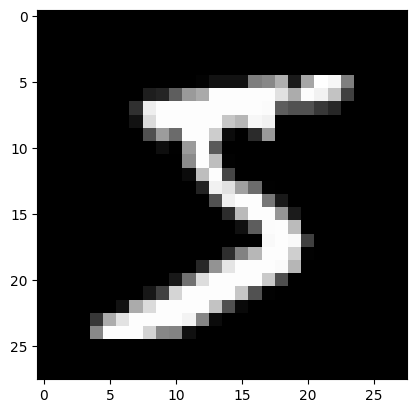

In [19]:
img, label = ds[0]

plt.imshow(img.squeeze(), cmap="gray")
print(label.shape)
print(label)

## Building our first Neural Network

In [20]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

We want to be able to train our model on the GPU, if available. Let's check to see if `torch.cuda` is available, otherwise we use the CPU.

In [21]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


We define our neural network by subclassing `nn.Module`, and initialize the neural network layers in `__init__`. Every `nn.Module` subclass implements the operations on input data in the `forward` method.

In [23]:
class MyNeuralNetwork(nn.Module):

    # initialize the network
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    # the forward pass of our network
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_stack(x)
        return logits

We create an instance of `NeuralNetwork`, and move it to the device, and print its structure.

In [24]:
model = MyNeuralNetwork().to(device)
print(model)

MyNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


To use the model, we pass our input tensors to the model. This invokes the model's `__call__` function, which executes the model's `forward`, along with some background operations. Do not call `model.forward()` directly!

Calling the model on the input returns a 2-dimensional tensor with `dim=0` corresponding to each output of 10 raw predicted values for each class, and `dim=1` corresponding to the individual values of each output. We get the prediction probabilities by passing it through an instance of the `nn.Softmax` module.

In [25]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(logits)
print(pred_probab)
print(f"Predicted class: {y_pred}")

tensor([[-0.0012,  0.0051,  0.0006, -0.0552,  0.0088, -0.0118,  0.0509, -0.1166,
          0.0833,  0.0660]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[0.0994, 0.1001, 0.0996, 0.0942, 0.1004, 0.0984, 0.1047, 0.0886, 0.1082,
         0.1063]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([8], device='cuda:0')


Let's break down the layers in our created model. To illustrate it, we will take a sample minibatch of $4$ random tensors of size $28 \times 28$ and see what happens to it as we pass it through the network.

In [26]:
rand_img_batch = torch.rand(4,28,28)
print(rand_img_batch.size())

torch.Size([4, 28, 28])


We initialize the `nn.Flatten` layer to convert each 2D $28 \times 28$ image into a contiguous array of $784$ pixel values ( the minibatch dimension (at `dim=0`) is maintained).

In [27]:
flatten = nn.Flatten()
flat_image_batch = flatten(rand_img_batch)
print(flat_image_batch.size())

torch.Size([4, 784])


Basically, the Flatten layer reduces the dimension of a Tensor.

In [28]:
data = [[[1, 2], [3, 4]]]
tensor = torch.tensor(data)
print(tensor)
print(flatten(tensor))

tensor([[[1, 2],
         [3, 4]]])
tensor([[1, 2, 3, 4]])


The `Linear` layer is a module that applies a linear transformation on the input using its stored weights and biases.

In [29]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image_batch)
print(hidden1.size())

torch.Size([4, 20])


Non-linear activations are what create the complex mappings between the model's inputs and outputs. They are applied after linear transformations to introduce nonlinearity, helping neural networks learn a wide variety of phenomena.

In this model, we use `nn.ReLU` between our linear layers, but there's other activations to introduce non-linearity in your model.

The ReLU (*Rectified Linear Unit*) function is a popular activation function used in artificial neural networks. As we have seen, it is simply defined as:

$$f(x)=max(0,x)$$

<figure>
<img src="https://github.com/bbirke/ml-python/blob/main/images/relu.svg?raw=true" alt="ai-ml-dl" width="600"/>
<figcaption>Fig.1 - Plot of the ReLU activation function.</figcaption>
</figure>

In [30]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.2624,  0.0750, -0.2372, -0.0991, -0.6515,  0.3464,  0.2905, -0.0165,
         -0.4387, -0.2944, -0.1325, -0.1028,  0.2723,  0.1412,  0.1085, -0.2612,
         -0.1197,  0.4442, -0.1755,  0.4942],
        [ 0.2764, -0.1604, -0.1399,  0.0347, -1.0635,  0.0876,  0.1034, -0.6255,
         -0.4286,  0.0867,  0.0243,  0.0067, -0.0913,  0.5019,  0.3063, -0.2229,
         -0.1896,  0.6495,  0.3047,  0.2041],
        [ 0.5710,  0.0570, -0.1447, -0.0834, -0.6049,  0.4222,  0.4821, -0.3544,
         -0.2529,  0.1516, -0.3431, -0.1386,  0.0549,  0.4789,  0.0698, -0.1323,
          0.0591,  0.6547,  0.0469,  0.1504],
        [ 0.7021, -0.2678, -0.0760,  0.3876, -0.6622,  0.2444,  0.2800, -0.7012,
         -0.6263,  0.0261,  0.0313, -0.1123, -0.1690,  0.4277,  0.3020, -0.4103,
         -0.4193,  0.4879,  0.1812,  0.5136]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.2624, 0.0750, 0.0000, 0.0000, 0.0000, 0.3464, 0.2905, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 

`nn.Sequential` is just an ordered container of modules. The data is passed through all the modules in the same order as defined.

In [31]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
rand_img_batch = torch.rand(4,28,28)
logits = seq_modules(rand_img_batch)
print(logits.shape)

torch.Size([4, 10])


The last linear layer of the neural network returns logits - raw values in $[- \infty, \infty]$ - which are passed to the `nn.Softmax` module. The logits are scaled to values $[0, 1]$ representing the model's predicted probabilities for each class. `dim` parameter indicates the dimension along which the values must sum to $1$.

In [32]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
print(pred_probab[0])
print(pred_probab.argmax(dim=1))

tensor([0.1059, 0.0888, 0.1137, 0.1048, 0.0844, 0.0746, 0.1284, 0.0973, 0.0978,
        0.1042], grad_fn=<SelectBackward0>)
tensor([6, 6, 6, 6])


## Training the model

Now that we have a model and data it's time to train, validate and test our model by optimizing its parameters on our data. Training a model is an iterative process; in each iteration the model makes a guess about the output, calculates the error in its guess (loss), collects the derivatives of the error with respect to its parameters, and optimizes these parameters using gradient descent.

As we have seen, hyperparameters are adjustable parameters that let you control the model optimization process. Different hyperparameter values can impact model training and convergence rates.

We define the following hyperparameters for training:

* **Number of Epochs** - the number times to iterate over the dataset

* **Batch Size** - the number of data samples propagated through the network before the parameters are updated

* **Learning Rate** - how much to update models parameters at each batch/epoch. Smaller values yield slow learning speed, while large values may result in unpredictable behavior during training.

In [33]:
epochs = 10
batch_size = 32 # was implicitly set with our dataloader
learning_rate = 1e-3

Once we set our hyperparameters, we can then train and optimize our model with an optimization loop. Each iteration of the optimization loop is called an **epoch**.

Each epoch consists of two main parts:

* **The Train Loop** - iterate over the training dataset and try to converge to optimal parameters.

* **The Validation/Test Loop** - iterate over the test dataset to check if model performance is improving.

Let's briefly familiarize ourselves with some of the concepts used in the training loop.

When presented with some training data, our untrained network is likely not to give the correct answer. The loss function measures the degree of dissimilarity of our obtained result to the target value, and it is the loss function that we want to minimize during training. To calculate the loss we make a prediction using the inputs of our given data sample and compare it against the true data label value.

Common loss functions include Mean Square Error for regression tasks (as we have already seen), and the Negative Log Likelihood for classification. The CrossEntropyLoss (`nn.CrossEntropyLoss`) combines `nn.LogSoftmax` and `nn.NLLLoss`.

We pass our model's output logits to `nn.CrossEntropyLoss`, which will normalize the logits and compute the prediction error.

In [34]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

Optimization is the process of adjusting model parameters to reduce model error in each training step. Optimization algorithms define how this process is performed (in this example we use Stochastic Gradient Descent). All optimization logic is encapsulated in the `optimizer` object. Here, we use the `SGD` optimizer; additionally, there are many different optimizers available in PyTorch such as ADAM and RMSProp, that work better for different kinds of models and data.

We initialize the optimizer by registering the model's parameters that need to be trained, and passing in the learning rate hyperparameter.

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Inside the training loop, optimization happens in three steps:

* Call `optimizer.zero_grad()` to reset the gradients of model parameters. Gradients by default add up; to prevent double-counting, we explicitly zero them at each iteration.

* Backpropagate the prediction loss with a call to `loss.backward()`. PyTorch deposits the gradients of the loss w.r.t. each parameter.

* Once we have our gradients, we call `optimizer.step()` to adjust the parameters by the gradients collected in the backward pass.

We define `train_loop` that loops over our optimization code, and `test_loop` that evaluates the model's performance against our test data.

In [35]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X = X.to(device)
        y = y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [36]:
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

What we haven't talked about is how we can measure the success of our classification. While the loss gives us a numerical value it can be hard to interpret, depending on the used loss function.

One way to measure closeness of the predicted values to the true value is using the **accuracy** of our classification. In the context of classification tasks, accuracy simply measures how often a model correctly predicts the class label of instances in the dataset. It is calculated as the ratio of the number of correct predictions to the total number of predictions made by the model, expressed as a percentage.
<br>
<br>

$$\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$$

We initialize the loss function and optimizer, and pass it to `train_loop` and `test_loop`.

In [38]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.306185  [   32/60000]
loss: 2.294487  [ 3232/60000]
loss: 2.298076  [ 6432/60000]
loss: 2.283750  [ 9632/60000]
loss: 2.287695  [12832/60000]
loss: 2.266314  [16032/60000]
loss: 2.282427  [19232/60000]
loss: 2.275945  [22432/60000]
loss: 2.263404  [25632/60000]
loss: 2.266824  [28832/60000]
loss: 2.260919  [32032/60000]
loss: 2.249004  [35232/60000]
loss: 2.248027  [38432/60000]
loss: 2.237187  [41632/60000]
loss: 2.209191  [44832/60000]
loss: 2.241862  [48032/60000]
loss: 2.236443  [51232/60000]
loss: 2.214289  [54432/60000]
loss: 2.210930  [57632/60000]
Test Error: 
 Accuracy: 60.8%, Avg loss: 2.198211 

Epoch 2
-------------------------------
loss: 2.215207  [   32/60000]
loss: 2.213301  [ 3232/60000]
loss: 2.182512  [ 6432/60000]
loss: 2.188138  [ 9632/60000]
loss: 2.175497  [12832/60000]
loss: 2.156097  [16032/60000]
loss: 2.119444  [19232/60000]
loss: 2.131491  [22432/60000]
loss: 2.119417  [25632/60000]
loss: 2.081156  [28832/60000

Looks good!

Let's visualize some unseen examples from the test set.

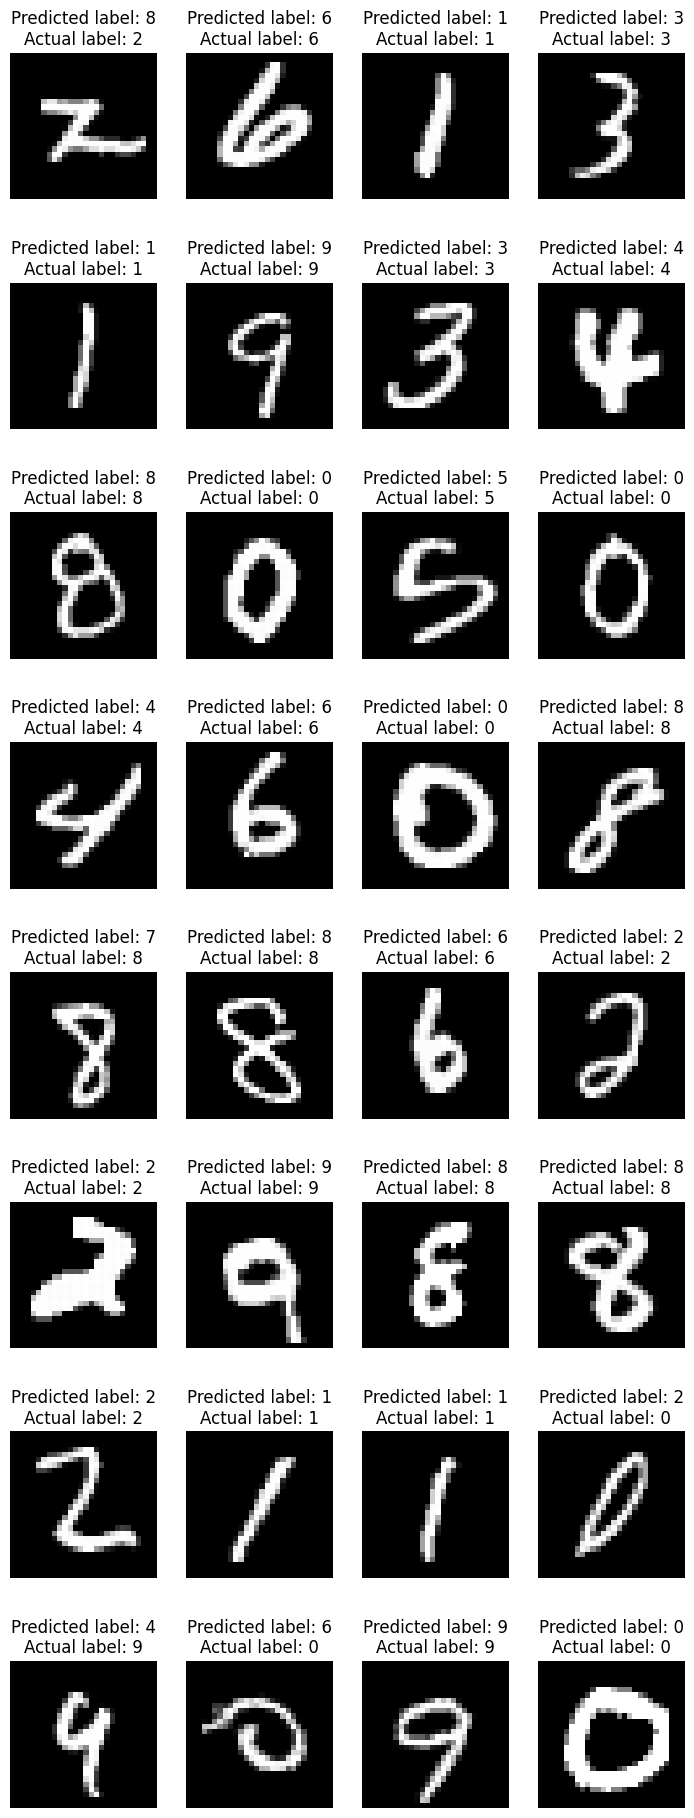

In [39]:
img, label = next(iter(test_dataloader))
img = img.to(device)
label = label.to(device)
predicted_label = model(img)

figure = plt.figure(figsize=(10, 20))
cols, rows = 4, 8
for i in range(0, cols * rows):
    figure.add_subplot(rows, cols, i + 1)
    plt.title(f"Predicted label: {predicted_label[i].argmax().item()}\nActual label: {label[i].item()}")
    plt.axis("off")
    plt.subplots_adjust(bottom=0.05, right=0.8, top=0.95)
    plt.imshow(img[i].cpu().squeeze(), cmap="gray")
plt.show()

We can also generate a confusion matrix, which plots the true labels against the predicted labels.

<Axes: >

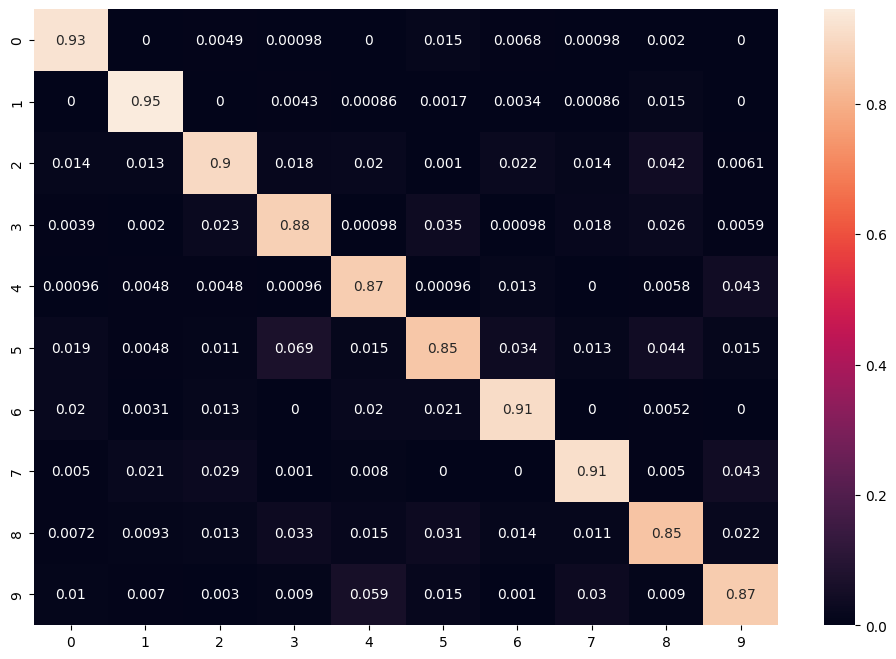

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

with torch.no_grad():
    # iterate over test data
    for X, y in test_dataloader:

            X = X.to(device)
            y = y.to(device)
            output = model(X)

            output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
            y_pred.extend(output)

            labels = y.data.cpu().numpy()
            y_true.extend(labels)

cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=0)[:, None], index = [i for i in range(10)],
                     columns = [i for i in range(10)])
plt.figure(figsize = (12,8))
sn.heatmap(df_cm, annot=True)